## The Apriori Algorithm

In [1]:
transactions = [
 ['curd', 'sour cream'], ['curd', 'orange', 'sour cream'],
 ['bread', 'cheese', 'butter'], ['bread', 'butter'], ['bread', 'milk'],
 ['apple', 'orange', 'pear'], ['bread', 'milk', 'eggs'], ['tea', 'lemon'],
 ['curd', 'sour cream', 'apple'], ['eggs', 'wheat flour', 'milk'],
 ['pasta', 'cheese'], ['bread', 'cheese'], ['pasta', 'olive oil', 'cheese'],
 ['curd', 'jam'], ['bread', 'cheese', 'butter'],
 ['bread', 'sour cream', 'butter'], ['strawberry', 'sour cream'],
 ['curd', 'sour cream'], ['bread', 'coffee'], ['onion', 'garlic']
]

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [5]:
# the unique values of the transaction set are put into columns
# then the items within a transaction record are one hot encoded
# each hot encoded column has true if yes, false if no for each original item in a record 
# then create a new dataframe (df_itemsets) for the new information

encoder = TransactionEncoder()
encoded_array = encoder.fit(transactions).transform(transactions)
df_itemsets = pd.DataFrame(encoded_array, columns=encoder.columns_)

In [6]:
df_itemsets.head(5)

,apple,bread,butter,cheese,coffee,curd,eggs,garlic,jam,lemon,milk,olive oil,onion,orange,pasta,pear,sour cream,strawberry,tea,wheat flour
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [9]:
df_itemsets.shape

(20, 20)

In [8]:
print('Number of transactions: ', len(transactions))
print('Number of unique items: ', len(set(sum(transactions,[]))))

Number of transactions:  20
Number of unique items:  20


## Identifying frequent itemsets

In [11]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_itemsets, min_support=0.1, use_colnames=True)

In [12]:
frequent_itemsets

,support,itemsets
0,0.10,(apple)
1,0.40,(bread)
2,0.20,(butter)
3,0.25,(cheese)
4,0.25,(curd)
5,0.10,(eggs)
6,0.15,(milk)
7,0.10,(orange)
8,0.10,(pasta)
9,0.30,(sour cream)


In [13]:
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda itemset: len(itemset))

In [15]:
print(frequent_itemsets[frequent_itemsets['length']>=2])

    support                 itemsets  length
10     0.20          (butter, bread)       2
11     0.15          (bread, cheese)       2
12     0.10            (milk, bread)       2
13     0.10         (butter, cheese)       2
14     0.10          (pasta, cheese)       2
15     0.20       (curd, sour cream)       2
16     0.10             (eggs, milk)       2
17     0.10  (butter, bread, cheese)       3


## Generating association rules

In [16]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [17]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(butter),(bread),0.20,0.40,0.20,1.000000,2.500000,1.0,0.120,inf,0.750000,0.500000,1.000000,0.750000
1,(bread),(butter),0.40,0.20,0.20,0.500000,2.500000,1.0,0.120,1.60,1.000000,0.500000,0.375000,0.750000
2,(cheese),(bread),0.25,0.40,0.15,0.600000,1.500000,1.0,0.050,1.50,0.444444,0.300000,0.333333,0.487500
3,(milk),(bread),0.15,0.40,0.10,0.666667,1.666667,1.0,0.040,1.80,0.470588,0.222222,0.444444,0.458333
4,(butter),(cheese),0.20,0.25,0.10,0.500000,2.000000,1.0,0.050,1.50,0.625000,0.285714,0.333333,0.450000
5,(pasta),(cheese),0.10,0.25,0.10,1.000000,4.000000,1.0,0.075,inf,0.833333,0.400000,1.000000,0.700000
6,(curd),(sour cream),0.25,0.30,0.20,0.800000,2.666667,1.0,0.125,3.50,0.833333,0.571429,0.714286,0.733333
7,(sour cream),(curd),0.30,0.25,0.20,0.666667,2.666667,1.0,0.125,2.25,0.892857,0.571429,0.555556,0.733333
8,(eggs),(milk),0.10,0.15,0.10,1.000000,6.666667,1.0,0.085,inf,0.944444,0.666667,1.000000,0.833333
9,(milk),(eggs),0.15,0.10,0.10,0.666667,6.666667,1.0,0.085,2.70,1.000000,0.666667,0.629630,0.833333


## Visualizing Association Rules

In [20]:
rules_plot = pd.DataFrame()
rules_plot["antecedents"] = rules["antecedents"].apply(lambda x: ','.join(list(x)))
rules_plot["consequents"] = rules["consequents"].apply(lambda x: ','.join(list(x)))
rules_plot["lift"] = rules["lift"].apply(lambda x: round(x,2))

In [21]:
pivot = rules_plot.pivot(index="antecedents", columns="consequents", values="lift")

In [22]:
pivot

consequents,bread,"bread,cheese",butter,cheese,curd,eggs,milk,sour cream
antecedents,,,,,,,,
bread,NaN,NaN,2.50,NaN,NaN,NaN,NaN,NaN
"bread,cheese",NaN,NaN,3.33,NaN,NaN,NaN,NaN,NaN
butter,2.50,3.33,NaN,2.0,NaN,NaN,NaN,NaN
"butter,bread",NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
"butter,cheese",2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cheese,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.67
eggs,NaN,NaN,NaN,NaN,NaN,NaN,6.67,NaN
milk,1.67,NaN,NaN,NaN,NaN,6.67,NaN,NaN


In [25]:
antecedents = list(pivot.index.values)
consequents = list(pivot.columns)
import numpy as np
pivot = pivot.to_numpy()

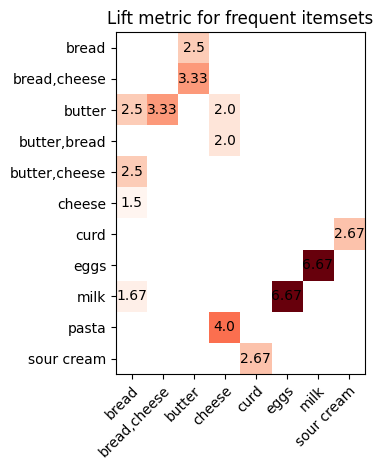

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
im = ax.imshow(pivot, cmap='Reds')
ax.set_xticks(np.arange(len(consequents)))
ax.set_yticks(np.arange(len(antecedents)))
ax.set_xticklabels(consequents)
ax.set_yticklabels(antecedents)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(antecedents)):
    for j in range(len(consequents)):
        if not np.isnan(pivot[i,j]):
            text = ax.text(j, i, pivot[i,j], ha="center", va="center")
ax.set_title("Lift metric for frequent itemsets")

fig.tight_layout()
plt.show()

## Generating recommendations

In [33]:
butter_antecedent = rules[rules["antecedents"]=={'butter'}][['consequents','confidence']] \
             .sort_values('confidence',ascending=False)

In [36]:
butter_consequents = [list(item) for item in butter_antecedent.iloc[0:3,:]['consequents']]

In [38]:
item = 'butter' 
print('Items frequently bought together with', item , 'are:', butter_consequents)

Items frequently bought together with butter are: [['bread'], ['cheese'], ['bread', 'cheese']]


## Planning discounts based on association rules

In [40]:
from functools import reduce

In [41]:
rules['itemsets'] = rules[['antecedents','consequents']].apply(lambda x:
                                                              reduce(frozenset.union,x), axis=1)

In [45]:
print(rules[['antecedents','consequents','itemsets']])

         antecedents      consequents                 itemsets
0           (butter)          (bread)          (butter, bread)
1            (bread)         (butter)          (butter, bread)
2           (cheese)          (bread)          (bread, cheese)
3             (milk)          (bread)            (bread, milk)
4           (butter)         (cheese)         (butter, cheese)
5            (pasta)         (cheese)          (cheese, pasta)
6             (curd)     (sour cream)       (curd, sour cream)
7       (sour cream)           (curd)       (curd, sour cream)
8             (eggs)           (milk)             (milk, eggs)
9             (milk)           (eggs)             (eggs, milk)
10   (butter, bread)         (cheese)  (butter, bread, cheese)
11  (butter, cheese)          (bread)  (butter, bread, cheese)
12   (bread, cheese)         (butter)  (butter, bread, cheese)
13          (butter)  (bread, cheese)  (butter, bread, cheese)


In [48]:
rules.drop_duplicates(subset=['itemsets'], keep='first', inplace=True)

In [49]:
rules['itemsets']

0             (butter, bread)
2             (bread, cheese)
3               (bread, milk)
4            (butter, cheese)
5             (cheese, pasta)
6          (curd, sour cream)
8                (milk, eggs)
10    (butter, bread, cheese)
Name: itemsets, dtype: object

In [51]:
discounted = []
others = []
for itemset in rules['itemsets']:
    for i, item in enumerate(itemset):
        if item not in others:
            discounted.append(item)
            itemset=set(itemset)
            itemset.discard(item)
            others.extend(itemset)
            break
        if i == len(itemset)-1:
            discounted.append(item)
            itemset = set(itemset)
            itemset.discard(item)
            others.extend(itemset)
print(discounted)

['butter', 'cheese', 'milk', 'butter', 'pasta', 'curd', 'milk', 'butter']


In [52]:
print(list(set(discounted)))

['curd', 'cheese', 'milk', 'pasta', 'butter']
